# **📌 CONTEXTO DE ESTUDIO**

* Autora: Ph(c). Gladys Choque Ulloa
* Dataset: University of California Irvine
Parkinson's Telemonitoring Dataset

### **Contexto clínico**

El dataset contiene 5,875 grabaciones de voz de 42 pacientes con Parkinson en etapa temprana.

## **🧠 Telemonitoreo de la progresión del Parkinson**

Trabajaremos con el dataset:

Parkinson’s Telemonitoring Dataset (Oxford)
Creado por investigadores de la Universidad de Oxford y publicado en:

A. Tsanas et al. (2009) – IEEE Transactions on Biomedical Engineering

El objetivo original fue predecir la progresión clínica del Parkinson (UPDRS) usando medidas acústicas de la voz capturadas remotamente.


### **🎯 Pregunta de investigación**

* ¿Las variables acústicas y los residuos del modelo lineal cumplen el supuesto de normalidad?
* ¿Qué implicaciones tiene esto para la inferencia estadística?

### **📊 Estructura del Análisis**

Trabajaremos en 6 etapas:
1. Carga y contexto.
2. Exploración inicial.
3. Normalidad en variables clave.
4. Pruebas formales.
5. Modelo lineal y normalidad de residuos.
6. Visualizaciones animadas y exportación GIF.

In [31]:
pip install pandas numpy matplotlib seaborn scipy statsmodels imageio

### **1️⃣ Carga de las líbrerias**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import imageio
import os

### **2️⃣ Cargar dataset**

In [ ]:
df = pd.read_csv("Parkinsons-Telemonitoring-ucirvine.csv")

print(df.shape)
df.head()

(5875, 22)


,subject,age,sex,test_time,motor_updrs,total_updrs,jitter,jitter_abs,jitter_rap,jitter_ppq5,...,shimmer_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimmer_dda,nhr,hnr,rpde,dfa,ppe
0,1,72,False,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,False,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,False,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,False,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,False,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


### **📌 2️⃣ Selección de variables**

In [ ]:
variables = ["motor_updrs", "jitter", "shimmer", "ppe"]
data = df[variables]
data.describe()

,motor_updrs,jitter,shimmer,ppe
count,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.296229,0.006154,0.034035,0.219589
std,8.129282,0.005624,0.025835,0.091498
min,5.037700,0.000830,0.003060,0.021983
25%,15.000000,0.003580,0.019120,0.156340
50%,20.871000,0.004900,0.027510,0.205500
75%,27.596500,0.006800,0.039750,0.264490
max,39.511000,0.099990,0.268630,0.731730


### **📊 3️⃣ Pruebas de Normalidad**

### **🔹 Shapiro-Wilk (muestra pequeña aleatoria)**

⚠️ Importante: Shapiro no es adecuado para muestras enormes.

In [ ]:
sample = data.sample(500, random_state=42)

for col in variables:
    stat, p = stats.shapiro(sample[col])
    print(f"{col}: W={stat:.4f}, p-value={p:.5f}")

motor_updrs: W=0.9794, p-value=0.00000
jitter: W=0.5426, p-value=0.00000
shimmer: W=0.6644, p-value=0.00000
ppe: W=0.9501, p-value=0.00000


### **🔹 Anderson-Darling**

In [ ]:
for col in variables:
    result = stats.anderson(data[col], dist='norm')
    print(f"\n{col}")
    print(f"Statistic: {result.statistic}")
    print(f"Critical values: {result.critical_values}")


motor_updrs
Statistic: 34.676018434190155
Critical values: [0.576 0.656 0.786 0.917 1.091]

jitter
Statistic: 627.0411759416247
Critical values: [0.576 0.656 0.786 0.917 1.091]

shimmer
Statistic: 402.4469393571271
Critical values: [0.576 0.656 0.786 0.917 1.091]

ppe
Statistic: 74.23390378619479
Critical values: [0.576 0.656 0.786 0.917 1.091]


### **📈 4️⃣ QQ-Plots**

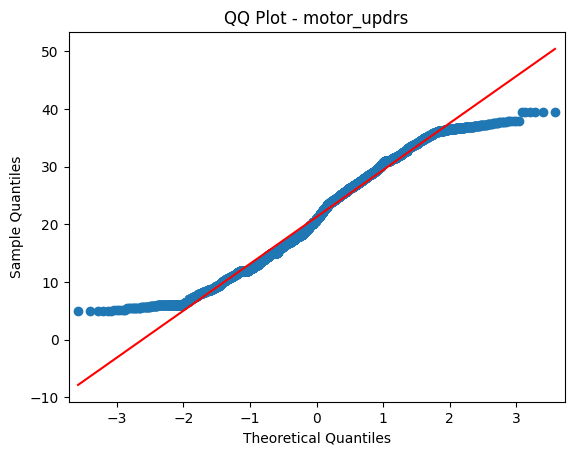

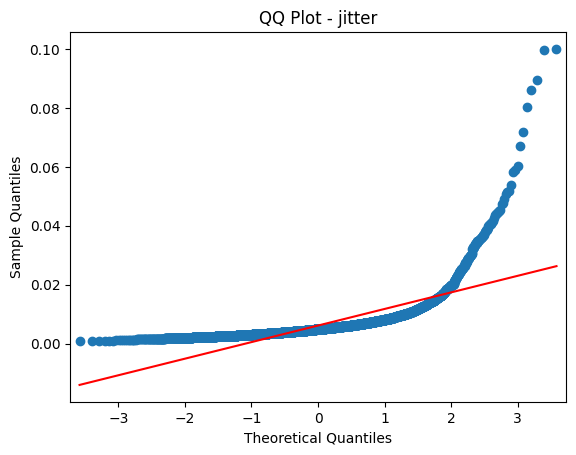

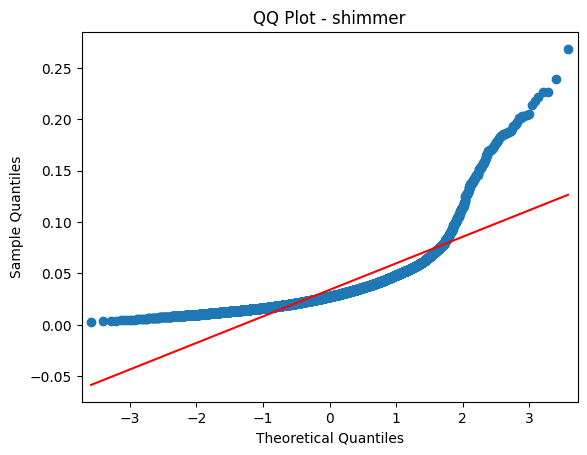

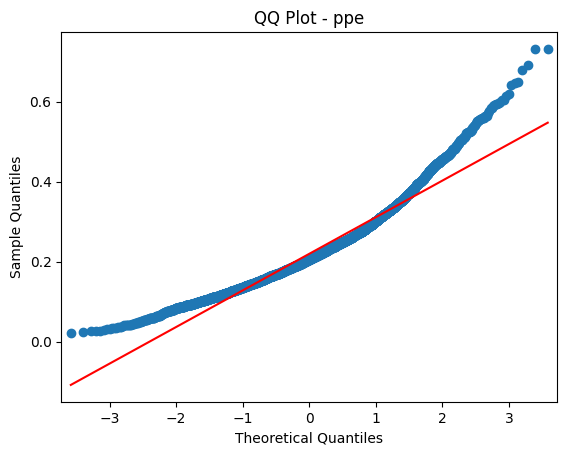

In [ ]:
for col in variables:
    sm.qqplot(data[col], line='s')
    plt.title(f"QQ Plot - {col}")
    plt.show()

### **📉 5️⃣ Modelo de Regresión**

Queremos predecir motor_updrs usando biomarcadores vocales.

In [ ]:
X = df[["jitter", "shimmer", "ppe"]]
y = df["motor_updrs"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            motor_updrs   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     59.39
Date:                Fri, 20 Feb 2026   Prob (F-statistic):           8.17e-38
Time:                        22:14:23   Log-Likelihood:                -20559.
No. Observations:                5875   AIC:                         4.113e+04
Df Residuals:                    5871   BIC:                         4.115e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.7085      0.290     61.101      0.0

### **📌 Extraer residuos**

In [ ]:
residuals = model.resid

### **📊 6️⃣ Normalidad de Residuos**

In [ ]:
stat, p = stats.shapiro(residuals.sample(500))
print(f"Residuos Shapiro: W={stat:.4f}, p-value={p:.5f}")

Residuos Shapiro: W=0.9760, p-value=0.00000


### **QQ-Plot residuos:**

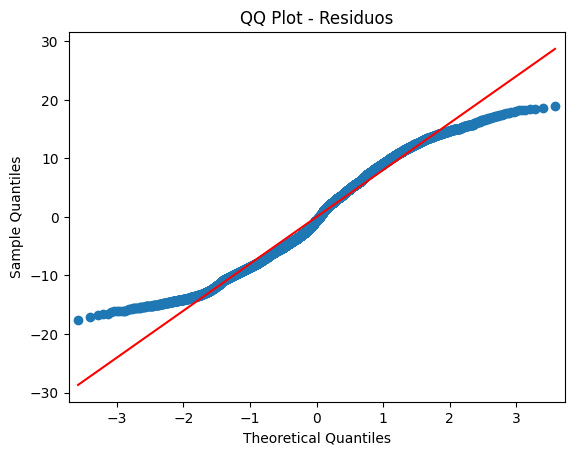

In [ ]:
sm.qqplot(residuals, line='s')
plt.title("QQ Plot - Residuos")
plt.show()

### **🎞️ 7️⃣ Visualizaciones Animadas**

Creamos animación mostrando evolución del histograma hacia QQ-plot.

In [ ]:
frames = []

for col in variables:
    fig, ax = plt.subplots(figsize=(6,4))

    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f"Distribución - {col}")

    filename = f"{col}_hist.png"
    plt.savefig(filename)
    frames.append(filename)
    plt.close()

    fig = sm.qqplot(data[col], line='s')
    plt.title(f"QQ Plot - {col}")
    filename = f"{col}_qq.png"
    plt.savefig(filename)
    frames.append(filename)
    plt.close()

# Crear GIF
with imageio.get_writer("normalidad_parkinson.gif", mode='I', duration=1.5) as writer:
    for frame in frames:
        image = imageio.imread(frame)
        writer.append_data(image)

print("GIF generado correctamente.")

/tmp/ipython-input-4008180909.py:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(frame)


GIF generado correctamente.


### **🎬 8️⃣ GIF Residuos**

In [ ]:
frames_res = []

plt.figure()
sns.histplot(residuals, kde=True)
plt.title("Residuos - Histograma")
plt.savefig("res_hist.png")
frames_res.append("res_hist.png")
plt.close()

fig = sm.qqplot(residuals, line='s')
plt.title("Residuos - QQ Plot")
plt.savefig("res_qq.png")
frames_res.append("res_qq.png")
plt.close()

with imageio.get_writer("residuos_normalidad.gif", mode='I', duration=2) as writer:
    for frame in frames_res:
        image = imageio.imread(frame)
        writer.append_data(image)

print("GIF residuos generado.")

GIF residuos generado.


/tmp/ipython-input-3927016369.py:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(frame)


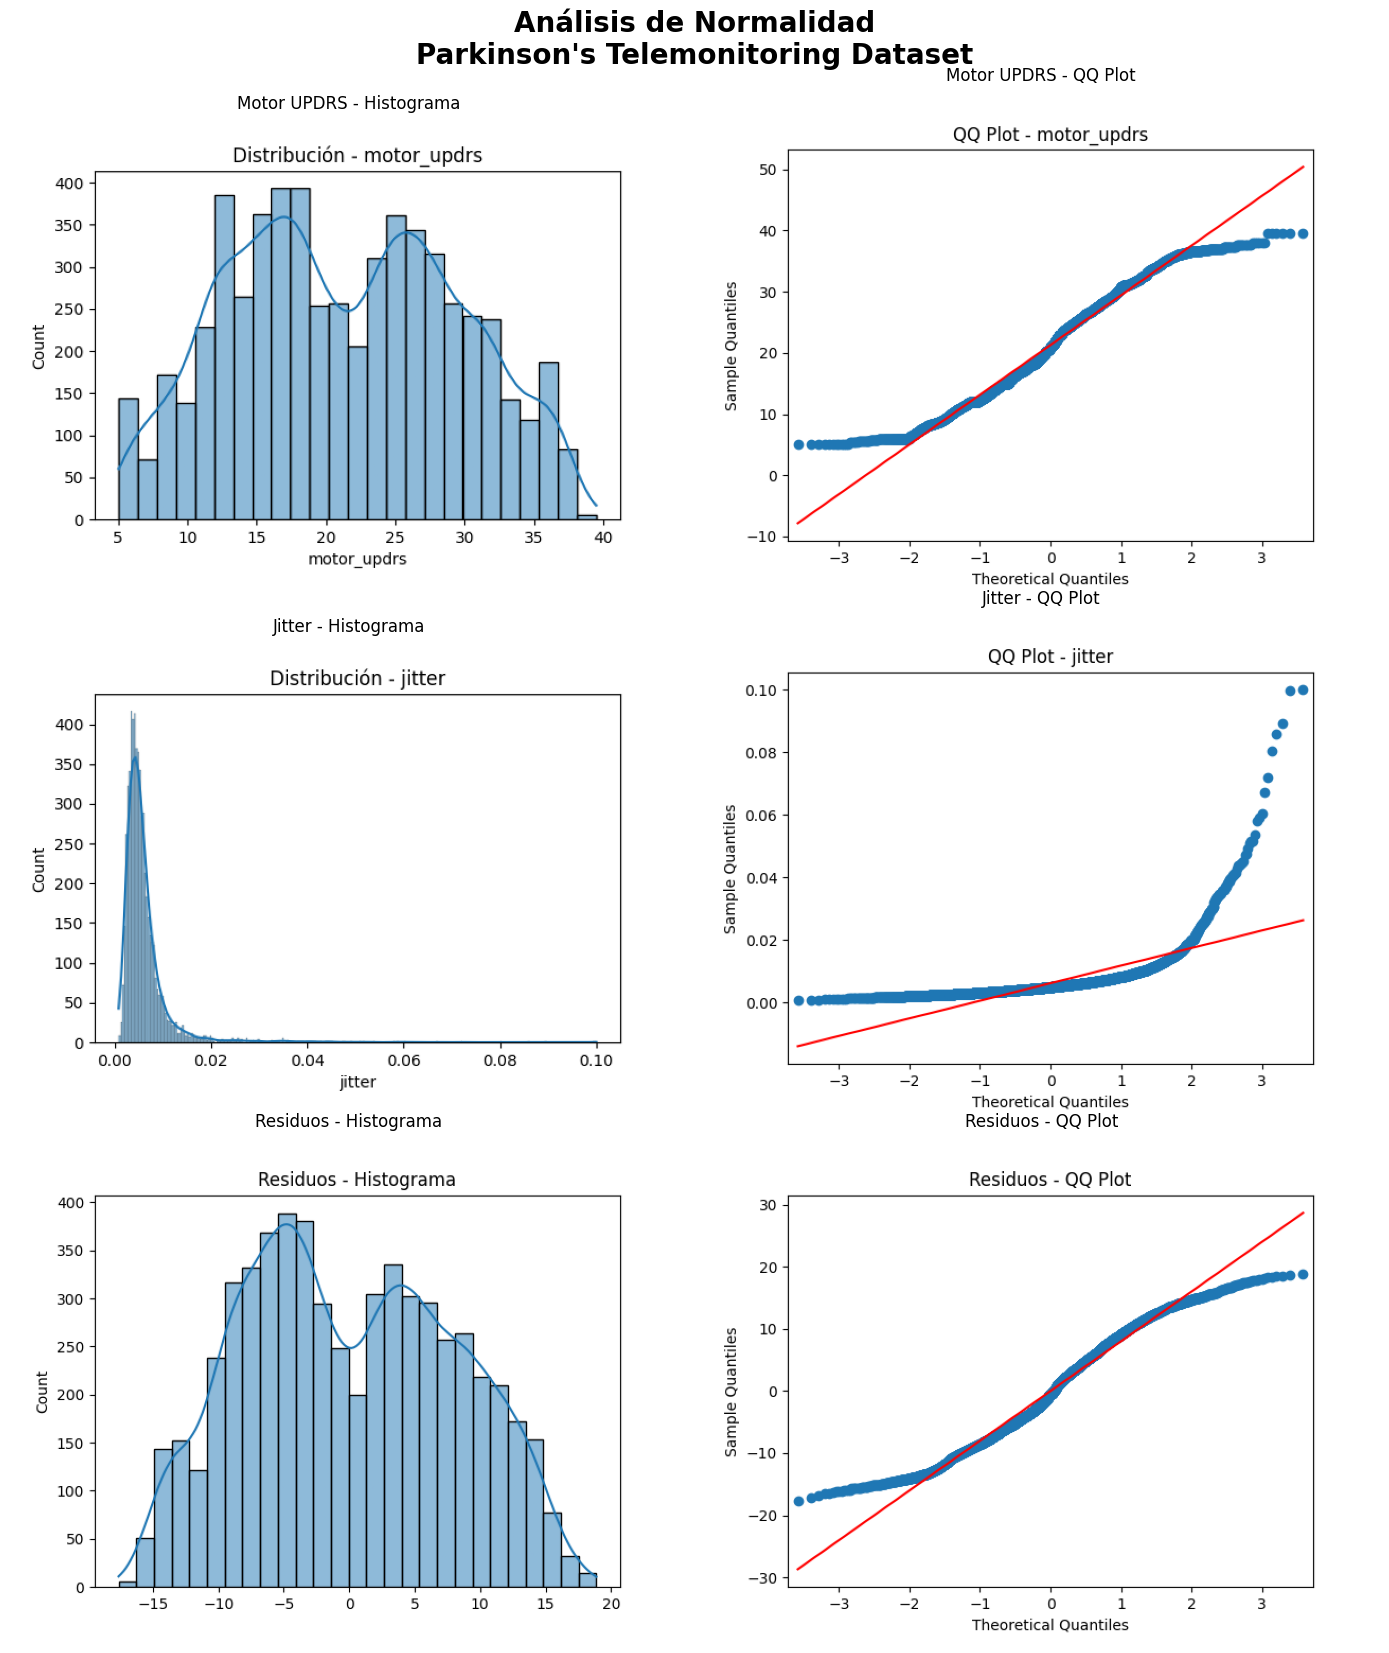

Imagen combinada guardada como panel_normalidad_3x2.png


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Lista de imágenes seleccionadas
images = [
    "motor_updrs_hist.png",
    "motor_updrs_qq.png",
    "jitter_hist.png",
    "jitter_qq.png",
    "res_hist.png",
    "res_qq.png"
]

titles = [
    "Motor UPDRS - Histograma",
    "Motor UPDRS - QQ Plot",
    "Jitter - Histograma",
    "Jitter - QQ Plot",
    "Residuos - Histograma",
    "Residuos - QQ Plot"
]

# Crear figura 3x2
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

fig.suptitle(
    "Análisis de Normalidad\nParkinson's Telemonitoring Dataset",
    fontsize=20,
    fontweight="bold",
    y=0.92
)

for ax, img_path, title in zip(axes.flatten(), images, titles):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.set_title(title, fontsize=12)
    ax.axis("off")

plt.tight_layout()
plt.subplots_adjust(top=0.88)

# Guardar imagen final
plt.savefig("panel_normalidad_3x2.png", dpi=300, bbox_inches="tight")
plt.show()

print("Imagen combinada guardada como panel_normalidad_3x2.png")

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio.v2 as imageio  # evitar warning
import os

# Lista de imágenes
images = [
    "motor_updrs_hist.png",
    "motor_updrs_qq.png",
    "jitter_hist.png",
    "jitter_qq.png",
    "res_hist.png",
    "res_qq.png"
]

titles = [
    "Motor UPDRS - Histograma",
    "Motor UPDRS - QQ Plot",
    "Jitter - Histograma",
    "Jitter - QQ Plot",
    "Residuos - Histograma",
    "Residuos - QQ Plot"
]

# Leer imágenes
imgs = [mpimg.imread(img) for img in images]

n_frames = 30  # cantidad de frames del GIF
duration = 0.2
frames = []

for i in range(n_frames):
    fig, axes = plt.subplots(3, 2, figsize=(14, 18))
    fig.suptitle(
        "Análisis de Normalidad\nParkinson's Telemonitoring Dataset",
        fontsize=20,
        fontweight="bold",
        y=0.92
    )

    # Movimiento dinámico: opacidad oscilante entre 0.8 y 1.0
    alpha_val = 0.8 + 0.2 * np.sin(2 * np.pi * i / n_frames)

    for ax, img, title in zip(axes.flatten(), imgs, titles):
        ax.imshow(img, alpha=alpha_val)  # solo cambia la opacidad
        ax.set_title(title, fontsize=12)
        ax.axis("off")

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)

    temp_file = f"temp_frame_{i}.png"
    plt.savefig(temp_file, dpi=150, bbox_inches="tight")
    plt.close()

    frames.append(imageio.imread(temp_file))

# Guardar GIF animado
imageio.mimsave("panel_normalidad_3x2_dinamico.gif", frames, duration=duration)

# Limpiar archivos temporales
for i in range(n_frames):
    os.remove(f"temp_frame_{i}.png")

print("GIF dinámico generado correctamente: panel_normalidad_3x2_dinamico.gif")

GIF dinámico generado correctamente: panel_normalidad_3x2_dinamico.gif
